<a href="https://colab.research.google.com/github/sarabert96/Colexification/blob/main/03_CreateColex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colexification Data Frame

This file creates a dataframe of colexifications.


NOTE: this file is in both python and R.


To run R code on colab execute the following line and in every cell remember to write %%R at the beginning of the R cell

In [ ]:
%load_ext rpy2.ipython

In [1]:
import pandas as pd

We take the cleaned dataframe from Drive

In [ ]:
!gdown --id 19eJ5URTvJEpL0qtdGOQ1XKUzWqX66Pkx #df_all_ok

Downloading...
From: https://drive.google.com/uc?id=19eJ5URTvJEpL0qtdGOQ1XKUzWqX66Pkx
To: /content/df_all_ok.csv
215MB [00:02, 98.1MB/s]


In [ ]:
df = pd.read_csv('df_all_ok.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
%%R # to run R on colab
#This script creates a data frame of colexifications 

library(dplyr)
library(readr)
library(tidyr)


if (!file.exists("df_colexifications.csv")){ #if the file doesnt exist: compute it
  df <- read_csv('df_all_ok.csv') # cleaned CLICS file
  d_colex <- df %>%
    select(clics_form,Concepticon_ID,Glottocode,Concepticon_Gloss,Family,variety) %>%
    drop_na() %>%
    unique()
    print('d_colex is now created selecting only relevant columns')
    print('first line of d_colex:')
    print(head(d_colex, 1))
    print(paste('number of rows is: ', nrow(d_colex)))

  dd <- inner_join(d_colex,d_colex,by=c("clics_form","Glottocode","Family","variety")) %>% 
    filter(Concepticon_ID.x != Concepticon_ID.y) %>% # find rows/cases where conditions are true
    unique() # remove duplicates
  d_colex <- dd[!duplicated(lapply(as.data.frame(t(dd), stringsAsFactors=FALSE), sort)),]  
  # remove rows where Concepticon_ID1 and Concepticon_ID2 are permutations of each other 
  print('d_colex is now finalized')
  print('first line of new d_colex:')
  print(head(d_colex, 1))
  print(paste('number of rows is: ', nrow(d_colex)))

  write_csv(d_colex,'df_colexifications.csv')
} else { #if it exists: load it
 print('Loading pre-processed colexification df')
  d_colex <- read_csv('df_colexifications.csv')
}

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union





── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  dataset_ID = col_character(),
  Form_ID = col_character(),
  Form = col_character(),
  clics_form = col_character(),
  gloss_in_source = col_character(),
  Concepticon_ID = col_double(),
  Concepticon_Gloss = col_character(),
  Ontological_Category = col_character(),
  Semantic_Field = col_character(),
  variety = col_character(),
  Glottocode = col_character(),
  ISO639P3code = col_character(),
  Macroarea = col_character(),
  Family = col_character(),
  Latitude = col_double(),
  Longitude = col_double(),
  tk_variety = col_character()
)

|==================================================================| 100% 205 MB
[1] "d_colex is now created selecting only relevant columns"
[1] "first line of d_colex:"
# A tibble: 1 x 6
  clics_form Concepticon_ID Glottocode Concepticon_Gloss Family      variety    
  <chr>               <dbl> <chr>      <chr>             <chr>       <ch

In [ ]:
df_colex = pd.read_csv('df_colexifications.csv')

In [15]:
df_colex.head(5)

,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y
0,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,1927,bamboo
1,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,946,blood
2,avir@,1035,miji1239,good,Sino-Tibetan,Dammai Dibin,923,love
3,dzju,1425,hrus1242,green,Hruso,Hruso Aka Jamiri,1424,yellow
4,lah,1277,dakp1242,hand,Sino-Tibetan,Monpa Changprong,639,mountain


To save dataframe:

In [ ]:
from google.colab import files

files.download('df_colexifications.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df_colex.groupby('Family').size().sort_values(ascending=True)

Family
Mairasic                 1
Namla-Tofanma            1
Kapori                   1
Elseng                   1
Somahai                  1
                     ...  
Austronesian          9676
Indo-European         9811
Nakh-Daghestanian    14236
Sino-Tibetan         14433
Atlantic-Congo       18765
Length: 181, dtype: int64

In [8]:
df_colex.groupby('Family').size().describe()

count      181.000000
mean       686.116022
std       2363.279833
min          1.000000
25%         12.000000
50%         66.000000
75%        269.000000
max      18765.000000
dtype: float64

In [9]:
colex_in_fam = list(df_colex.groupby('Family').size())

In [13]:
import matplotlib.pyplot as plt

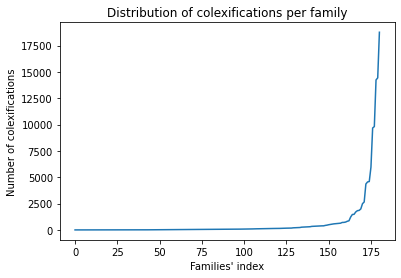

In [14]:
plt.plot(sorted(colex_in_fam))
plt.title("Distribution of colexifications per family")
plt.ylabel('Number of colexifications')
plt.xlabel("Families' index")
plt.show()